In [1]:
import pandas as pd
data = pd.read_csv(
    'https://github.com/datagy/data/raw/main/titanic.csv',
    usecols=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'])
data = data.dropna()

print(data.head())

   Survived  Pclass     Sex   Age  SibSp     Fare Embarked
0         0       3    male  22.0      1   7.2500        S
1         1       1  female  38.0      1  71.2833        C
2         1       3  female  26.0      0   7.9250        S
3         1       1  female  35.0      1  53.1000        S
4         0       3    male  35.0      0   8.0500        S


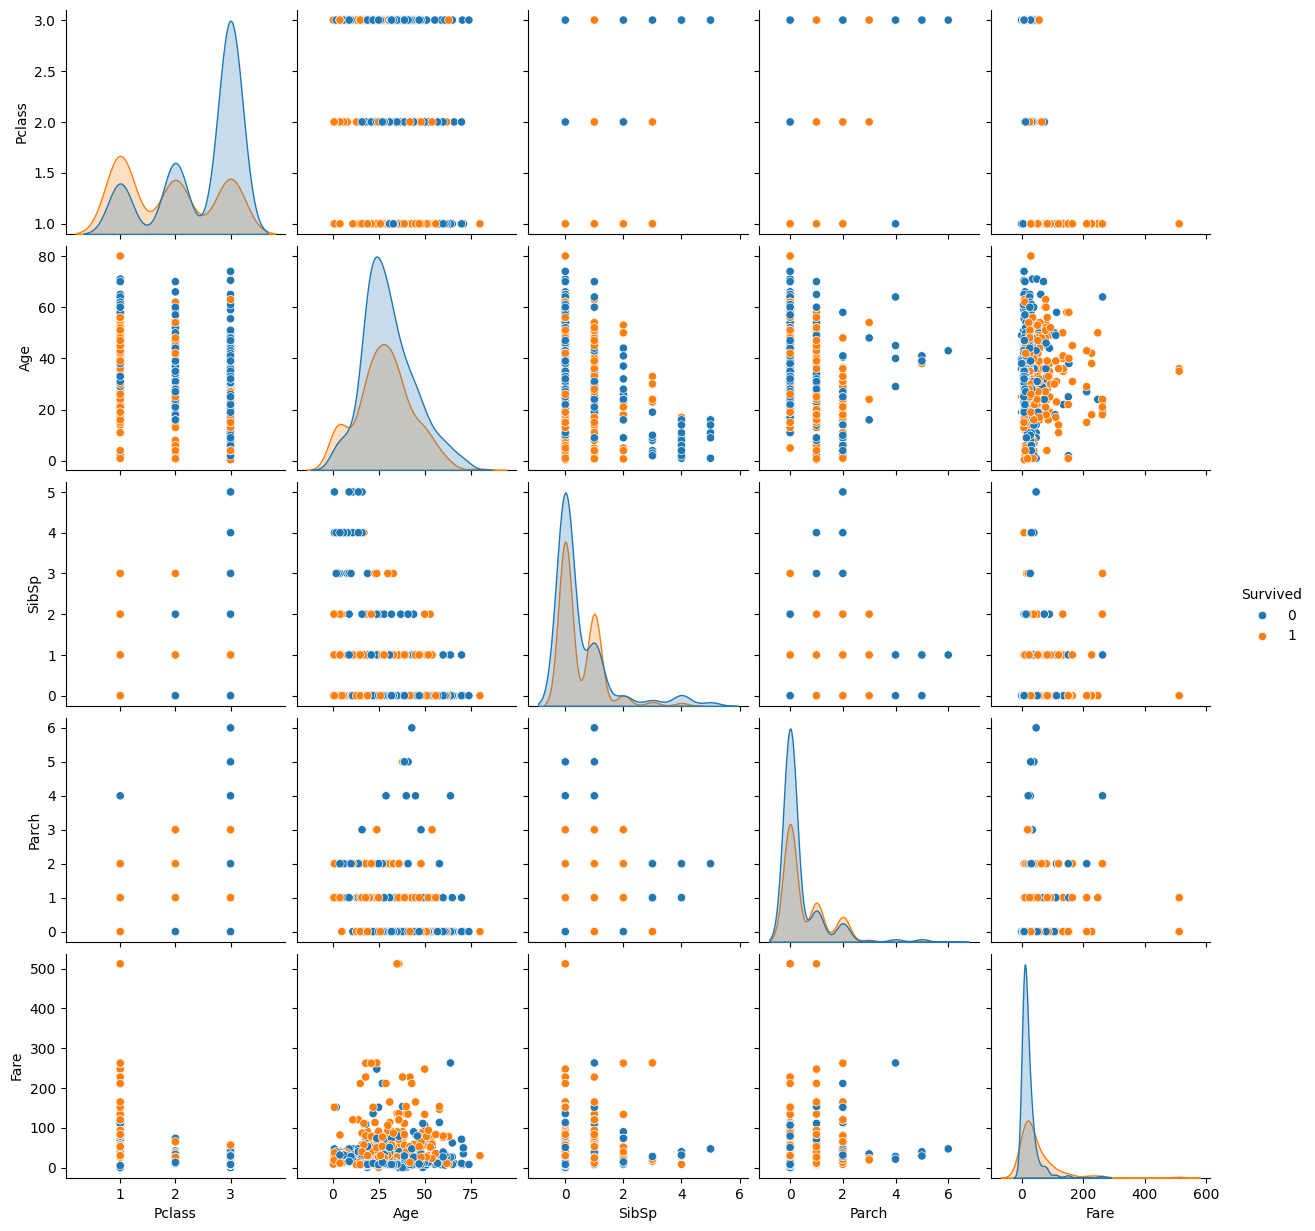

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(
    'https://github.com/datagy/data/raw/main/titanic.csv',
    usecols=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])
data = data.dropna()

sns.pairplot(data=data, hue='Survived')
plt.show()

In [3]:
import pandas as pd

data = pd.read_csv(
    'https://github.com/datagy/data/raw/main/titanic.csv',
    usecols=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
data = data.dropna()

X = data.copy()
y = X.pop('Survived')

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [5]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

DecisionTreeClassifier()

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
predictions = clf.predict(X_test)
print(predictions[:5])

[0 1 0 0 0]


In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.6871508379888268


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = pd.read_csv(
    'https://github.com/datagy/data/raw/main/titanic.csv',
    usecols=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked'])
X = X.dropna()
y = X.pop('Survived')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

column_transformer = make_column_transformer(
    (OneHotEncoder(), ['Sex', 'Embarked']),
    remainder='passthrough')

X_train = column_transformer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=column_transformer.get_feature_names_out())

In [11]:
X_test = column_transformer.transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=column_transformer.get_feature_names_out())

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7808988764044944
